<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/Electro%20Pi%20Scholarship/Automated_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages Importing

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [391]:

class EDA:
  def read_dataset(dataset):
    return pd.read_csv(dataset)

  def show_head(dataset):
    return dataset.head()

  def data_describe(dataset):
    return dataset.describe(include='all')
  
  def visulize_correlation(dataset):
    cor = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(cor,annot=True)
    plt.show() 
  
  def col_info(dataset):
    return dataset.info()
  
  def dataset_isna(dataset):
    return dataset.isna().sum()

  def visulize_missing_value(dataset):
    if dataset.isnull().sum().sum() != 0:
        na_df = (dataset.isnull().sum() / len(dataset)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title('dataset')
        plt.show()

  def examine_features(dataset):
    numeric_features = []
    categorical_features = []
    bol_features = []
    for col in dataset.columns:
      if (dataset[col].dtype == np.float64 or dataset[col].dtype == np.int64):
        numeric_features.append(col)
      if(dataset[col].dtype == np.object_):
        categorical_features.append(col)
      if(dataset[col].dtype == np.bool_):
        bol_features.append(col)
    print(numeric_features)
    print('****************************************************************************')
    print(f'There is {len(numeric_features)} numeric features.') 
    print('----------------------------------------------------------------------------')
    print(categorical_features)
    print('****************************************************************************')
    print(f'There is {len(categorical_features)} categorical features.')
    print('----------------------------------------------------------------------------')
    print(bol_features)
    print('****************************************************************************')
    print(f'There is {len(bol_features)} bol features.')

  def fill_missing_values(dataset):
    cateogry_columns=dataset.select_dtypes(include=['object']).columns.tolist()
    integer_columns=dataset.select_dtypes(include=['int64','float64']).columns.tolist()
    for column in dataset:
     if dataset[column].isnull().any():
        if(column in cateogry_columns):
            dataset[column]=dataset[column].fillna(dataset[column].mode()[0])
        if(column in integer_columns):
            dataset[column]=dataset[column].fillna(dataset[column].mean())
   
    
    
  def pie_plotting(dataset,col):
    if dataset[col].dtype == np.object_: 
      label = dataset[col].unique()
      data = dataset[col].value_counts()
      plt.figure(figsize=(8,8))
      plt.pie(x=data,labels=label,autopct='%.0f%%',shadow=True,)
      plt.legend()
      plt.show()
    else:
      raise TypeError('dtype of given feature is not object')

  
  def count_plotting(dataset,col,col2,col3=None):
    sns.countplot(x=dataset[col],hue=dataset[col2])

  def drop_unnecessary_cols(dataset,cols):
    dataset.drop(cols,axis=1,inplace=True)
  
  
  def handling_bool_datatype(dataset):
    dataset.replace({False:0 , True:1},inplace=True)



## Data Police Shooting

In [366]:
dataset = '/content/gdrive/MyDrive/electro pi scholarship/fatal-police-shootings-data.csv'

df = EDA.read_dataset(dataset)
EDA.show_head(df)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [367]:
EDA.data_describe(df)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,5416.000000,5416,5416,5416,5189,5181.000000,5414,4895,5416,5416,5416,5416,5167,5416
unique,NaN,5206,1844,2,93,NaN,2,6,2470,51,2,3,4,2
top,NaN,TK TK,2018-06-29,shot,gun,NaN,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,NaN,187,9,5146,3060,NaN,5176,2476,85,799,4200,3495,3411,4798
mean,3010.398264,NaN,NaN,NaN,NaN,37.117931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1695.786456,NaN,NaN,NaN,NaN,13.116135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1545.750000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3009.500000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4486.250000,NaN,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


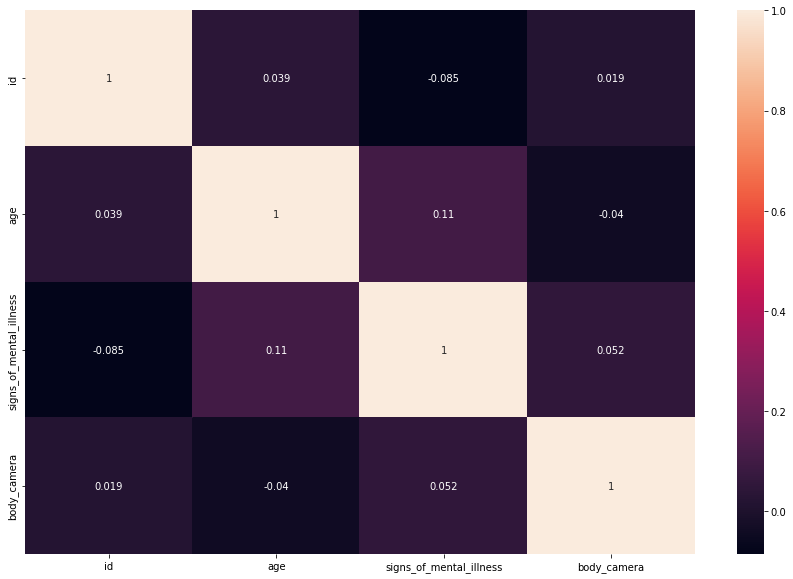

In [368]:
EDA.visulize_correlation(df)

#### Cheking missing values

In [369]:
EDA.col_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [370]:
EDA.dataset_isna(df)

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

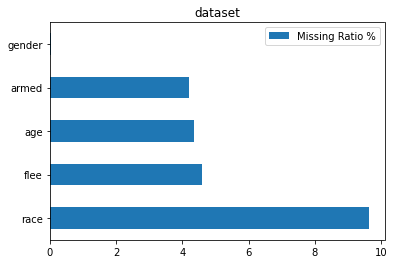

In [371]:
EDA.visulize_missing_value(df)

In [372]:
EDA.examine_features(df)

['id', 'age']
****************************************************************************
There is 2 numeric features.
----------------------------------------------------------------------------
['name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'threat_level', 'flee']
****************************************************************************
There is 10 categorical features.
----------------------------------------------------------------------------
['signs_of_mental_illness', 'body_camera']
****************************************************************************
There is 2 bol features.


In [373]:
EDA.fill_missing_values(df)

In [374]:
EDA.dataset_isna(df)

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

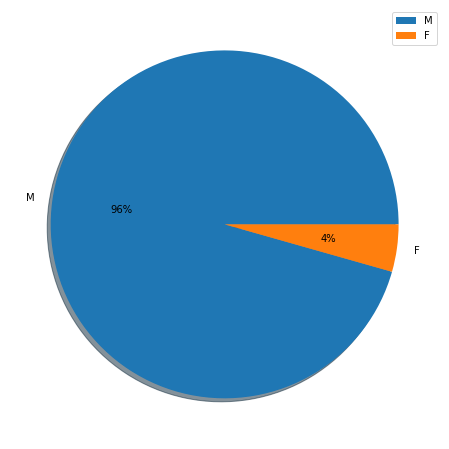

In [375]:
# gender
EDA.pie_plotting(df,'gender')

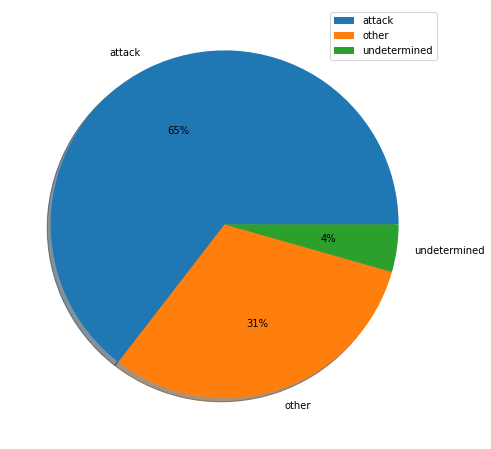

In [376]:
# threat level
EDA.pie_plotting(df,'threat_level')

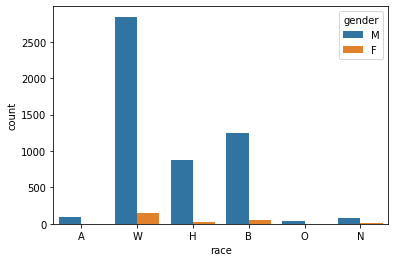

In [377]:
EDA.count_plotting(df,'race','gender')

In [378]:
EDA.drop_unnecessary_cols(df,['id','name'])

In [379]:
EDA.show_head(df)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [380]:
EDA.handling_bool_datatype(df)

In [381]:
# convert object to datetime
df['date'] = pd.to_datetime(df.date)

In [382]:
# handling object features
col = ['manner_of_death','armed','gender','race','city','state','threat_level','flee']
df = pd.get_dummies(df[col])


In [383]:
EDA.col_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Columns: 2631 entries, manner_of_death_shot to flee_Other
dtypes: uint8(2631)
memory usage: 13.6 MB


In [384]:
EDA.show_head(df)

,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Airsoft pistol,armed_BB gun,armed_BB gun and vehicle,armed_Taser,armed_air conditioner,armed_air pistol,armed_ax,armed_barstool,...,state_WI,state_WV,state_WY,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# Retail Data Analytics

In [393]:
stores_dataset = '/content/gdrive/MyDrive/electro pi scholarship/stores data-set.csv'
features_dataset = '/content/gdrive/MyDrive/electro pi scholarship/Features data set.csv'
sales_dataset = '/content/gdrive/MyDrive/electro pi scholarship/sales data-set.csv'


In [395]:
df_stores = EDA.read_dataset(stores_dataset)
EDA.show_head(df_stores)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [397]:
df_features = EDA.read_dataset(features_dataset)
EDA.show_head(df_features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [398]:
df_sales = EDA.read_dataset(sales_dataset)
EDA.show_head(df_sales)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [404]:
# Stores dataset
EDA.data_describe(df_stores)

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


In [403]:
# Features dataset
EDA.data_describe(df_features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,05/02/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


In [402]:
# Sales dataset
EDA.data_describe(df_sales)

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,23/12/2011,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


## Correlation

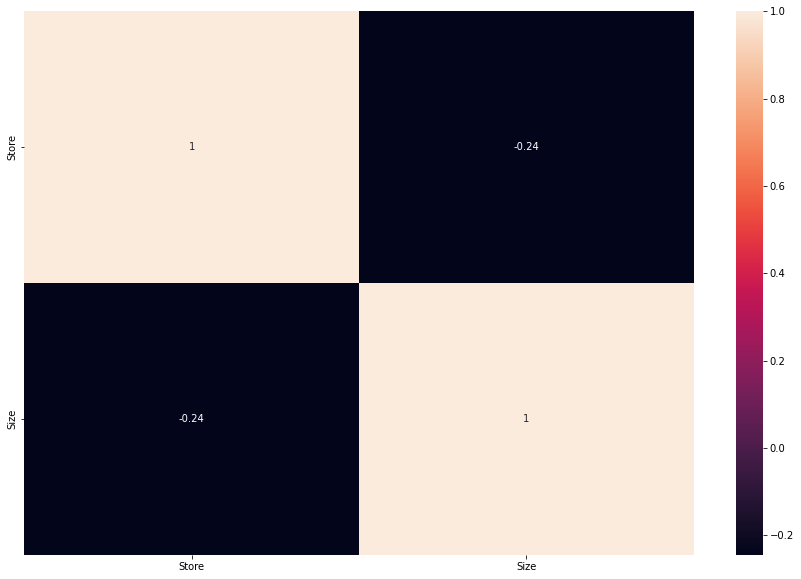

In [406]:
EDA.visulize_correlation(df_stores)

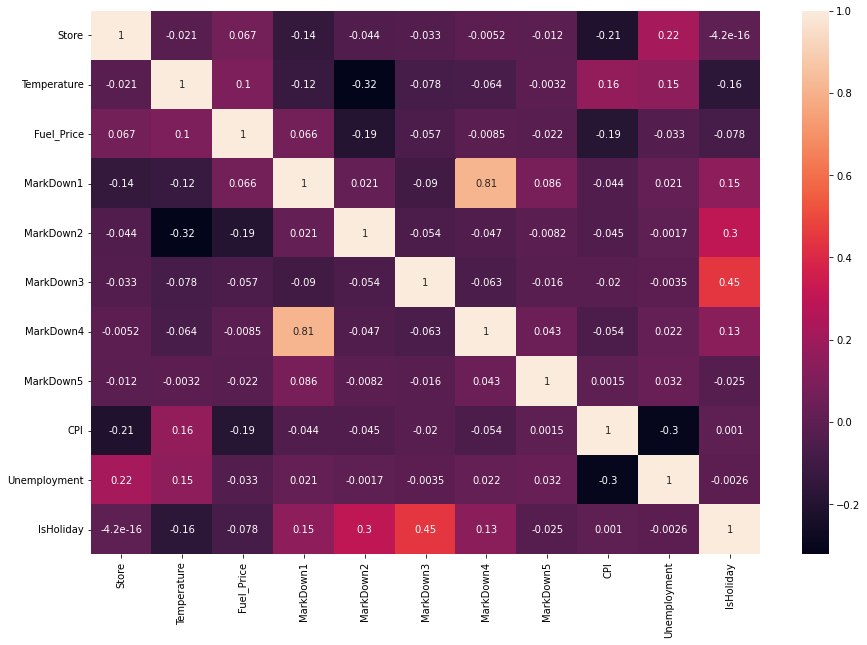

In [407]:
EDA.visulize_correlation(df_features)

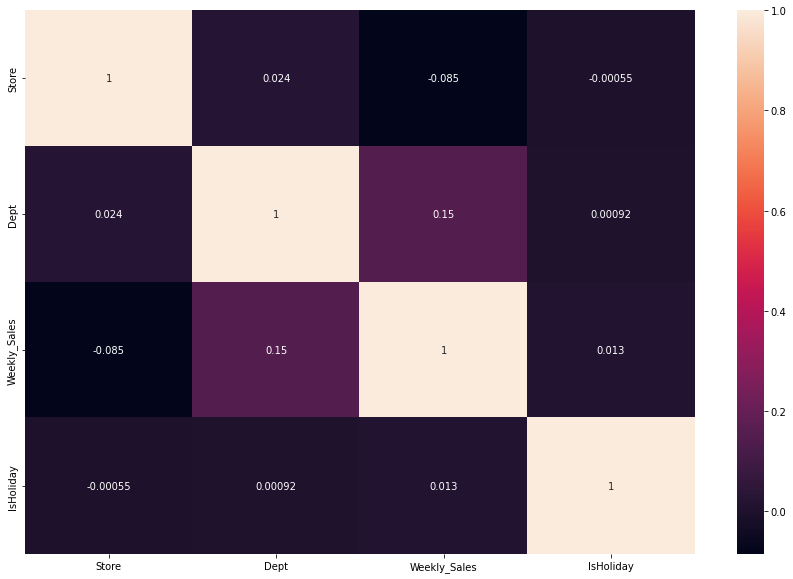

In [408]:
EDA.visulize_correlation(df_sales)

## Check on variable types

In [409]:
EDA.col_info(df_stores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [410]:
EDA.col_info(df_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [412]:
EDA.col_info(df_sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Checking missing values and visualize them

In [413]:
EDA.dataset_isna(df_stores)

Store    0
Type     0
Size     0
dtype: int64

In [415]:
EDA.dataset_isna(df_features)

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

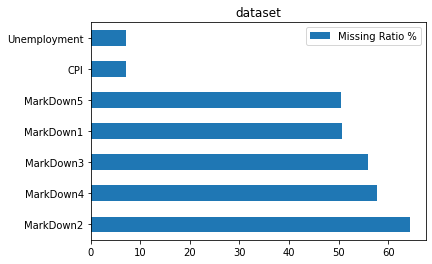

In [417]:
EDA.visulize_missing_value(df_features)

In [416]:
EDA.dataset_isna(df_sales)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

## examininig features

In [419]:
EDA.examine_features(df_features)

['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
****************************************************************************
There is 10 numeric features.
----------------------------------------------------------------------------
['Date']
****************************************************************************
There is 1 categorical features.
----------------------------------------------------------------------------
['IsHoliday']
****************************************************************************
There is 1 bol features.


In [420]:
EDA.examine_features(df_sales)

['Store', 'Dept', 'Weekly_Sales']
****************************************************************************
There is 3 numeric features.
----------------------------------------------------------------------------
['Date']
****************************************************************************
There is 1 categorical features.
----------------------------------------------------------------------------
['IsHoliday']
****************************************************************************
There is 1 bol features.


In [421]:
EDA.examine_features(df_stores)

['Store', 'Size']
****************************************************************************
There is 2 numeric features.
----------------------------------------------------------------------------
['Type']
****************************************************************************
There is 1 categorical features.
----------------------------------------------------------------------------
[]
****************************************************************************
There is 0 bol features.


## Dealing a missing values 

In [422]:
EDA.fill_missing_values(df_features)

In [423]:
EDA.dataset_isna(df_features)

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

## Handling datatypes

In [427]:
# features dataset
# convert object to datetime
df_features['Date'] = pd.to_datetime(df_features['Date'])

In [428]:
EDA.handling_bool_datatype(df_features)

In [429]:
EDA.col_info(df_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 767.9 KB


In [430]:
# sales dataset
EDA.handling_bool_datatype(df_sales)
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [431]:
EDA.col_info(df_sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 16.1 MB


In [439]:
col = ['Type']
df_stores = pd.get_dummies(df_stores[col])

In [440]:
EDA.col_info(df_stores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Type_A  45 non-null     uint8
 1   Type_B  45 non-null     uint8
 2   Type_C  45 non-null     uint8
dtypes: uint8(3)
memory usage: 263.0 bytes
